**환경 안내**
- 로컬 환경 실행 시 아래 `%pip install matplotlib numpy pandas` 셀 실행
- 터미널에서 `python3 -m pip install numpy pandas matplotlib`
- Colab에서도 버전 충돌이 생기면 해당 pip 셀을 다시 실행

In [ ]:
%pip install matplotlib numpy pandas

# Sorting

정렬 알고리즘은 그 자체로도 중요하지만, 알고리즘의 설계와 분석 방법을 훈련하는 데 매우 좋은 주제다.

정렬(Sorting)이란 원소들을 순서대로 배열하는 것을 의미한다. 크기가 작은 순(오름차순)이나 큰 순(내림차순)으로 배열할 수 있으며, 숫자, 단어, 코드 등 크기 비교가 가능한 모든 것에 적용할 수 있다. PC의 파일을 이름순으로 정렬하거나 학생 성적을 점수순으로 정렬하는 것 모두 정렬의 예이다.


## 1\. 정렬 알고리즘 분류

정렬 알고리즘은 수행 시간에 따라 크게 세 그룹으로 나눌 수 있다.

**기본 정렬: $\Theta(n^2)$**
  * 선택 정렬 (Selection Sort)
  * 버블 정렬 (Bubble Sort)
  * 삽입 정렬 (Insertion Sort)

**고급 정렬: $\Theta(n \log n)$**
  * 병합 정렬 (Merge Sort)
  * 퀵 정렬 (Quick Sort)
  * 힙 정렬 (Heap Sort)
  * 셸 정렬 (Shell Sort)


**특수 정렬: $\Theta(n)$**

원소들이 특수한 성질(e.g., 정수, 균등 분포)을 만족할 때 $\Theta(n)$이 소요되는 정렬 알고리즘 그룹
  * 계수 정렬 (Counting Sort)
  * 기수 정렬 (Radix Sort)
  * 버킷 정렬 (Bucket Sort)

## 2\. 기본 정렬 알고리즘: $\Theta(n^2)$

### 2.1. Selection Sort (선택 정렬)

#### **Concept**
1. 배열 `A[0...n-1]`에서 **가장 큰 원소**를 찾는다.
2. 찾은 가장 큰 원소를 배열의 맨 끝자리 원소 `A[n-1]`과 **자리를 바꾼다**.
3. 이제 `A[n-1]`은 제자리를 찾았으므로, `A[0...n-2]` 범위를 대상으로 1-2번 과정을 반복한다.
4. 정렬할 범위의 크기가 1이 될 때까지 이 작업을 반복한다.

#### **Performance**

* 최선, 평균, 최악 모두 $\Theta(n^2)$
* 가장 큰 수를 찾기 위해 매번 $(n-1), (n-2), ..., 1$ 회의 비교를 수행하므로, 총 비교 횟수는 $n(n-1)/2$로 항상 동일
* 데이터의 초기 정렬 상태와 관계없이 항상 같은 시간이 소요

In [1]:
# @title
# -*- coding: utf-8 -*-
import sys, time

# Set recursion depth (though not needed for selection sort, good practice if mixing algos)
sys.setrecursionlimit(2_000_000)

def selection_sort(A, *, trace=False, pause=0.0, key=lambda x: x):
    """
    Implements the Selection Sort algorithm.

    - trace: bool - If True, prints the sorting process step-by-step.
    - pause: float - Delay in seconds between trace steps.
    - key: function - A function to extract the comparison key from an item.
    """
    n = len(A)
    comps = swaps = 0

    # --- Start of Visualization Setup ---

    # Calculate dynamic cell width for clean printing
    # We need space for the largest value OR the largest index number, plus 1 space.
    try:
        max_val_len = max(len(str(item)) for item in A) if n > 0 else 1
        max_idx_len = len(str(n - 1)) if n > 0 else 1
        cell_w = max(max_val_len, max_idx_len) + 1
    except Exception:
        # Fallback for complex objects, though key() is used for comparison
        cell_w = 5

    def _render(note="", i=None, k=None, last=None):
        """
        Internal helper function to render the current state of the array.
        - `i` is the current scan pointer.
        - `k` is the pointer to the current maximum element found.
        - `last` is the boundary of the unsorted partition.
        """
        if note:
            print(f"# {note}")

        # Build string representations for each line
        idx_line = ["idx: "]
        val_line = ["val: "]
        rail_line = ["     "]  # 5 spaces to align with 'val: '

        # Handle the partition marker for the "fully sorted" state
        if last == -1:
            idx_line.append(" |")
            val_line.append(" |")
            rail_line.append(" |")

        for p in range(n):
            # 1. Index Line
            idx_line.append(f"{p:>{cell_w}}")

            # 2. Value Line
            val_line.append(f"{A[p]:>{cell_w}}")

            # 3. Pointer Line (Rail)
            # Collect all pointers that apply to this index
            ptrs = []
            if p == i: ptrs.append('i')
            if p == k: ptrs.append('k')
            if p == last: ptrs.append('L')

            s = "".join(ptrs)
            if not s: s = " "  # Ensure at least one space for alignment

            # Center the pointer(s) in the cell
            rail_line.append(f"{s:^{cell_w}}")

            # Add partition marker *after* the 'last' element
            if p == last:
                idx_line.append(" |")
                val_line.append(" |")
                rail_line.append(" |")

        # Print all lines
        print("".join(idx_line))
        print("".join(val_line))
        print("".join(rail_line))
        print()  # Add a blank line for readability

        if pause > 0:
            time.sleep(pause)

    # --- End of Visualization Setup ---

    if trace:
        # Initial state: unsorted partition is the whole array [0...n-1]
        _render("Start: selection_sort", last=n-1)

    # Main sorting loop
    # 'last' is the index of the last item in the unsorted partition.
    for pass_no, last in enumerate(range(n - 1, 0, -1), 1):
        k = 0  # Index of the maximum element in A[0...last]

        for i in range(1, last + 1):
            comps += 1
            if key(A[i]) > key(A[k]):
                k = i
            if trace and pause > 0: # Only render *every* scan step if pausing
                _render(f"Pass {pass_no}: Scanning (cmp #{comps})", i=i, k=k, last=last)

        if trace and pause == 0: # Otherwise, just render the *result* of the scan
            _render(f"Pass {pass_no}: Scan complete (cmp #{comps})", i=None, k=k, last=last)


        # Swap the found maximum A[k] with the last element A[last]
        if k != last:
            A[k], A[last] = A[last], A[k]
            swaps += 1
            if trace:
                _render(f"Pass {pass_no}: Swap A[{k}] <-> A[{last}] (swap #{swaps})",
                        k=k, last=last)
        else:
            if trace:
                _render(f"Pass {pass_no}: Max already at last. No swap.", last=last)

    if trace:
        # Final state: unsorted partition is empty (marker at index -1)
        _render("Done: selection_sort", last=-1)
        print(f"# Summary: comparisons={comps}, swaps={swaps}\n")

    return A

# --- Demonstration ---
arr_sel = [8, 31, 48, 73, 3, 65, 20, 29, 11, 15]  # [Figure 9-3] Example
print(f"Before selection sort: {arr_sel}")
print("-" * 20)

# Run with tracing enabled (pause=0.0 for instant results)
selection_sort(arr_sel, trace=True, pause=0.0)

print("-" * 20)
print(f"After selection sort: {arr_sel}")

# --- Bonus: Example with larger numbers and a pause ---
# arr_big = [100, 2, 555, 42, 9]
# print(f"\nBefore (big): {arr_big}")
# print("-" * 20)
# selection_sort(arr_big, trace=True, pause=0.5) # 0.5초 지연
# print("-" * 20)
# print(f"After (big): {arr_big}")

Before selection sort: [8, 31, 48, 73, 3, 65, 20, 29, 11, 15]
--------------------
# Start: selection_sort
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   8 31 48 73  3 65 20 29 11 15 |
                                 L  |

# Pass 1: Scan complete (cmp #9)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   8 31 48 73  3 65 20 29 11 15 |
               k                 L  |

# Pass 1: Swap A[3] <-> A[9] (swap #1)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   8 31 48 15  3 65 20 29 11 73 |
               k                 L  |

# Pass 2: Scan complete (cmp #17)
idx:   0  1  2  3  4  5  6  7  8 |  9
val:   8 31 48 15  3 65 20 29 11 | 73
                     k        L  |   

# Pass 2: Swap A[5] <-> A[8] (swap #2)
idx:   0  1  2  3  4  5  6  7  8 |  9
val:   8 31 48 15  3 11 20 29 65 | 73
                     k        L  |   

# Pass 3: Scan complete (cmp #24)
idx:   0  1  2  3  4  5  6  7 |  8  9
val:   8 31 48 15  3 11 20 29 | 65 73
            k              L  |      

# Pass 3: Swap A[2] <-> 

### 2.2. Bubble Sort (버블 정렬)

#### **Concept**
선택 정렬과 아이디어는 유사하나(가장 큰 것을 맨 뒤로 보냄), 가장 큰 원소를 옮기는 방법이 다르다.

1. 배열의 왼쪽 `A[0]`부터 시작하여, **이웃한 두 원소 `A[i]`, `A[i+1]`를 비교**
2. 만약 `A[i] > A[i+1]` 이면 두 원소의 자리를 **swap**
3. 1-2번을 `i = 0` 부터 `last-1` 까지 반복하면, 가장 큰 원소가 `A[last]`로 **bubble** 처럼 올라감
4. `last`를 `n-1`부터 1까지 줄여가며 이 작업을 반복 (선택 정렬과 비슷)

#### **Performance**

* 기본적으로는 최선, 평균, 최악 모두 **$\Theta(n^2)$**.
* 비교 횟수는 선택 정렬과 같이 $n(n-1)/2$.
* 다만, 내부 루프()에서 원소 교환이 한 번도 일어나지 않았는지 `swapped` 플래그로 체크할 경우
  -> **이미 정렬된 배열(최선)**에 대해서는 $\Theta(n)$에 종료 가능
* 그러나 평균적으로는 이웃한 원소 간 교환이 많아 선택 정렬보다 느림 (약 5배)

In [4]:
# @title
import sys, time
sys.setrecursionlimit(2_000_000)

def bubble_sort(A, *, trace=False, pause=0.0, key=lambda x: x):
    """
    Bubble Sort (with last-swap boundary optimization) + human-friendly tracing.

    - trace: bool        → 단계별 상태를 출력한다.
    - pause: float       → 트레이스 프레임 사이의 지연(초). 0이면 이벤트/패스 요약만 출력.
    - key: callable      → 비교 키 함수.
    """
    n = len(A)
    comps = swaps = 0

    # --- Visualization width ---
    try:
        max_val_len = max(len(str(item)) for item in A) if n > 0 else 1
        max_idx_len = len(str(n - 1)) if n > 0 else 1
        cell_w = max(max_val_len, max_idx_len) + 1
    except Exception:
        cell_w = 5

    def _render(note="", i=None, j=None, last=None):
        if note:
            print(f"# {note}")
        idx_line, val_line, rail_line = ["idx: "], ["val: "], ["     "]
        if last == -1:
            idx_line.append(" |"); val_line.append(" |"); rail_line.append(" |")
        for p in range(n):
            idx_line.append(f"{p:>{cell_w}}")
            val_line.append(f"{A[p]:>{cell_w}}")
            ptrs = []
            if p == i: ptrs.append('i')
            if p == j: ptrs.append('j')
            if p == last: ptrs.append('L')
            s = "".join(ptrs) if ptrs else " "
            rail_line.append(f"{s:^{cell_w}}")
            if p == last:
                idx_line.append(" |"); val_line.append(" |"); rail_line.append(" |")
        print("".join(idx_line))
        print("".join(val_line))
        print("".join(rail_line))
        print()
        if pause > 0:
            time.sleep(pause)

    if trace:
        _render("Start: bubble_sort", last=n-1)

    if n < 2:
        if trace:
            _render("Done: bubble_sort", last=-1)
            print(f"# Summary: comparisons={comps}, swaps={swaps}\n")
        return A

    last = n - 1
    pass_no = 0
    while last > 0:
        pass_no += 1
        swapped = False
        new_last = 0
        for i in range(0, last):
            j = i + 1
            comps += 1
            if trace and pause > 0:
                _render(f"Pass {pass_no}: Compare A[{i}] vs A[{j}] (cmp #{comps})", i=i, j=j, last=last)
            if key(A[i]) > key(A[j]):
                A[i], A[j] = A[j], A[i]
                swaps += 1
                swapped = True
                new_last = i
                if trace:
                    _render(f"Pass {pass_no}: Swap A[{i}] <-> A[{j}] (swap #{swaps})", i=i, j=j, last=last)
        if trace and pause == 0:
            _render(f"Pass {pass_no}: Pass complete (cmp #{comps})", last=last)

        if not swapped:
            break
        last = new_last

    if trace:
        _render("Done: bubble_sort", last=-1)
        print(f"# Summary: comparisons={comps}, swaps={swaps}\n")

    return A

# --- 시연 ---
if __name__ == "__main__":
    arr_bub = [3, 31, 48, 73, 8, 11, 20, 29, 65, 15]  # [그림 9-4] 예제
    print(f"Before bubble sort: {arr_bub}")
    print("-" * 20)
    bubble_sort(arr_bub, trace=True, pause=0.0)
    print("-" * 20)
    print(f"After bubble sort:  {arr_bub}")

Before bubble sort: [3, 31, 48, 73, 8, 11, 20, 29, 65, 15]
--------------------
# Start: bubble_sort
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   3 31 48 73  8 11 20 29 65 15 |
                                 L  |

# Pass 1: Swap A[3] <-> A[4] (swap #1)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   3 31 48  8 73 11 20 29 65 15 |
               i  j              L  |

# Pass 1: Swap A[4] <-> A[5] (swap #2)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   3 31 48  8 11 73 20 29 65 15 |
                  i  j           L  |

# Pass 1: Swap A[5] <-> A[6] (swap #3)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   3 31 48  8 11 20 73 29 65 15 |
                     i  j        L  |

# Pass 1: Swap A[6] <-> A[7] (swap #4)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   3 31 48  8 11 20 29 73 65 15 |
                        i  j     L  |

# Pass 1: Swap A[7] <-> A[8] (swap #5)
idx:   0  1  2  3  4  5  6  7  8  9 |
val:   3 31 48  8 11 20 29 65 73 15 |
                           i  j  L  |

# Pass 1: Swap

### 2.3. Insertion Sort (삽입 정렬)

#### **Concept**
'정렬된 배열'의 크기를 1에서 $n$으로 점차 늘려가는 방식 *(**cf.** 선택 정렬, 버블 정렬)*

1.  `A[0]`은 그 자체로 크기 1인 정렬된 배열로 본다.
2.  `i`를 $1$ ~ $n-1$까지 순회한다.
3.  `A[i]`를 `newItem`으로 임시 저장
4.  이미 정렬된 `A[0...i-1]` 배열을 **오른쪽에서 왼쪽으로** 훑으면서, `newItem`이 들어갈 올바른 자리를 찾는다.
5.  `newItem`보다 큰 원소들은 한 칸씩 오른쪽으로 shift(밀어낸다).
6.  올바른 자리를 찾으면 `newItem`을 그 자리에 insert(삽입).

#### **Performance**

  * **최악 (역순 정렬) / 평균: $\Theta(n^2)$**
  * **최선 (이미 정렬): $\Theta(n)$**
    * `while` 루프가 한 번도 수행되지 않고(비교 1회) 바로 끝나기 때문
  * **'거의 정렬된'** 배열에 대해서는 $\Theta(n)$에 가까운 매우 빠른 속도
    * 이 특성이 셸 정렬(Shell Sort)의 핵심 아이디어가 됨

In [5]:
# @title
import sys, time
sys.setrecursionlimit(2_000_000)

def insertion_sort(A, *, trace=False, pause=0.0, key=lambda x: x):
    """
    Insertion Sort + human-friendly tracing.

    - trace: bool    →  단계별 상태를 출력한다.
    - pause: float   →  트레이스 프레임 사이의 지연(초). 0이면 이벤트/패스 요약만 출력.
    - key: callable  →  비교 키 함수.
    """
    n = len(A)
    comps = shifts = 0

    # --- Visualization width ---
    try:
        max_val_len = max(len(str(item)) for item in A) if n > 0 else 1
        max_idx_len = len(str(n - 1)) if n > 0 else 1
        cell_w = max(max_val_len, max_idx_len) + 1
    except Exception:
        cell_w = 5

    def _render(note="", i=None, p=None, ins=None, last=None):
        if note:
            print(f"# {note}")
        idx_line, val_line, rail_line = ["idx: "], ["val: "], ["     "]
        if last == -1:
            idx_line.append(" |"); val_line.append(" |"); rail_line.append(" |")
        for x in range(n):
            idx_line.append(f"{x:>{cell_w}}")
            val_line.append(f"{A[x]:>{cell_w}}")
            ptrs = []
            if x == i:   ptrs.append('i')   # outer index
            if x == p:   ptrs.append('p')   # probe to the left
            if x == ins: ptrs.append('I')   # insertion slot (loc+1)
            if x == last:ptrs.append('L')   # end of sorted prefix
            s = "".join(ptrs) if ptrs else " "
            rail_line.append(f"{s:^{cell_w}}")
            if x == last:
                idx_line.append(" |"); val_line.append(" |"); rail_line.append(" |")
        print("".join(idx_line))
        print("".join(val_line))
        print("".join(rail_line))
        print()
        if pause > 0:
            time.sleep(pause)

    if trace:
        # 초기에는 정렬된 구간이 A[0] 하나뿐이므로 L=0
        _render("Start: insertion_sort", last=0)

    for i in range(1, n):
        new_item = A[i]
        loc = i - 1
        if trace:
            _render(f"i={i}: Pick A[{i}] → new_item", i=i, p=loc, last=i-1)

        # 좌측으로 이동하며 new_item보다 큰 원소들을 한 칸씩 우측으로 민다.
        while loc >= 0:
            comps += 1
            if key(new_item) < key(A[loc]):
                A[loc + 1] = A[loc]
                shifts += 1
                if trace:
                    _render(f"i={i}: Shift A[{loc}] → A[{loc+1}] (cmp #{comps}, shift #{shifts})",
                            p=loc, last=i-1)
                loc -= 1
            else:
                break

        A[loc + 1] = new_item
        if trace:
            _render(f"i={i}: Insert new_item at {loc+1}", ins=loc+1, last=i)

    if trace:
        _render("Done: insertion_sort", last=-1)
        print(f"# Summary: comparisons={comps}, shifts={shifts}\n")

    return A

# --- 시연 ---
if __name__ == "__main__":
    arr_ins = [3, 31, 48, 73, 8, 11, 20, 29, 65, 15]  # [그림 9-5] 유사 초기 상태
    print(f"Before insertion sort: {arr_ins}")
    print("-" * 20)
    insertion_sort(arr_ins, trace=True, pause=0.0)
    print("-" * 20)
    print(f"After insertion sort:  {arr_ins}")

Before insertion sort: [3, 31, 48, 73, 8, 11, 20, 29, 65, 15]
--------------------
# Start: insertion_sort
idx:   0 |  1  2  3  4  5  6  7  8  9
val:   3 | 31 48 73  8 11 20 29 65 15
      L  |                           

# i=1: Pick A[1] → new_item
idx:   0 |  1  2  3  4  5  6  7  8  9
val:   3 | 31 48 73  8 11 20 29 65 15
     pL  | i                         

# i=1: Insert new_item at 1
idx:   0  1 |  2  3  4  5  6  7  8  9
val:   3 31 | 48 73  8 11 20 29 65 15
        IL  |                        

# i=2: Pick A[2] → new_item
idx:   0  1 |  2  3  4  5  6  7  8  9
val:   3 31 | 48 73  8 11 20 29 65 15
        pL  | i                      

# i=2: Insert new_item at 2
idx:   0  1  2 |  3  4  5  6  7  8  9
val:   3 31 48 | 73  8 11 20 29 65 15
           IL  |                     

# i=3: Pick A[3] → new_item
idx:   0  1  2 |  3  4  5  6  7  8  9
val:   3 31 48 | 73  8 11 20 29 65 15
           pL  | i                   

# i=3: Insert new_item at 3
idx:   0  1  2  3 |  4  5  6  7  8 

### 2.4. 기본 정렬 성능 비교


$\Theta(n^2)$ 알고리즘은 $N$이 커질수록 수행 시간이 기하급수적(quadratically) 증가한다.

* $N=100,000$


== Quadratic sorts — seconds ==
       N      Bubble_s  Selection_s  Insertion_s
    1000      0.001333     0.000260     0.000098
    5000      0.033320     0.006508     0.002455
   10000      0.133280     0.026030     0.009820
   20000      0.533120     0.104120     0.039280
   50000      3.332000     0.650750     0.245500
  100000     13.328000     2.603000     0.982000
  200000     53.312000    10.412000     3.928000
  500000    333.200000    65.075000    24.550000
 1000000   1332.800000   260.300000    98.200000
10000000 133280.000000 26030.000000  9820.000000

== Quadratic sorts — HH:MM:SS ==
       N Bubble_hms Selection_hms Insertion_hms
    1000   00:00:00      00:00:00      00:00:00
    5000   00:00:00      00:00:00      00:00:00
   10000   00:00:00      00:00:00      00:00:00
   20000   00:00:01      00:00:00      00:00:00
   50000   00:00:03      00:00:01      00:00:00
  100000   00:00:13      00:00:03      00:00:01
  200000   00:00:53      00:00:10      00:00:04
  500000  

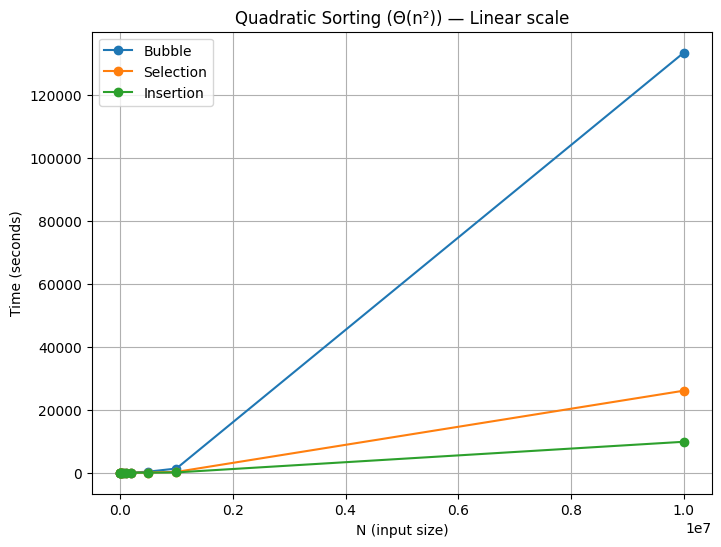

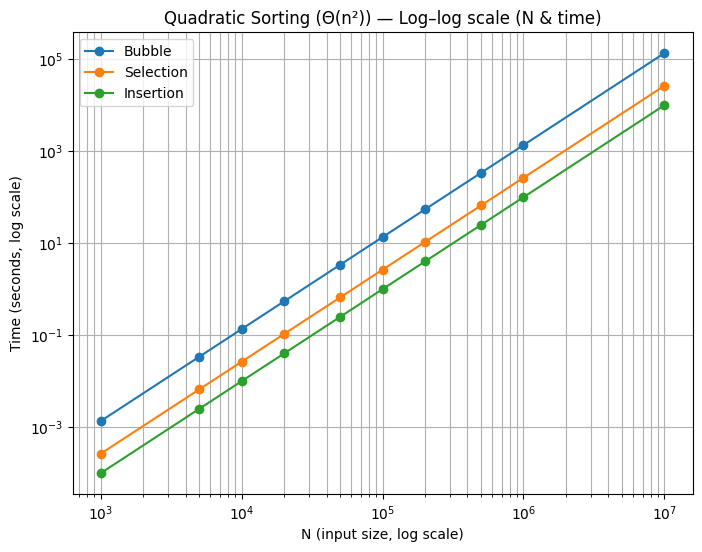


Saved CSV to: content/quadratic_sorts_times.csv
Saved linear plot to: content/quadratic_sorts_plot_linear.png
Saved log–log plot to: content/quadratic_sorts_plot_loglog.png
Wrote script to: content/quadratic_sorts_benchmark_plot.py


In [6]:
# @title
# Quadratic-sorts scaling: build a clear table and both linear/log-log plots from given baseline times.
#
# Baseline at N0 = 100_000 (as provided):
# - Bubble:    13.328 s
# - Selection:  2.603 s
# - Insertion:  0.982 s
#
# Θ(n^2) scaling: t(N) = t0 * (N/N0)^2
# Outputs:
#   - Console tables (seconds, HH:MM:SS)
#   - Linear-scale plot → content/quadratic_sorts_plot_linear.png
#   - Log–log plot      → content/quadratic_sorts_plot_loglog.png
#   - CSV               → content/quadratic_sorts_times.csv
#   - Repro .py script  → content/quadratic_sorts_benchmark_plot.py

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

OUTPUT_DIR = Path("content")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)


# ---------------------------
# Configuration / Parameters
# ---------------------------
N0 = 100_000
baseline = {
    "Bubble": 13.328,
    "Selection": 2.603,
    "Insertion": 0.982,
}

# Choose a set of N values that shows the growth cleanly.
Ns = np.array([
    1_000,
    5_000,
    10_000,
    20_000,
    50_000,
    100_000,
    200_000,
    500_000,
    1_000_000,
    10_000_000,
], dtype=np.int64)

# ---------------------------
# Helper: seconds -> HH:MM:SS
# ---------------------------
def to_hms(seconds: float) -> str:
    if not math.isfinite(seconds):
        return "N/A"
    sec = int(round(seconds))
    h = sec // 3600
    m = (sec % 3600) // 60
    s = sec % 60
    return f"{h:02d}:{m:02d}:{s:02d}"

# ---------------------------
# Compute times under Θ(n^2)
# ---------------------------
rows = []
for N in Ns:
    row = {"N": int(N)}
    for alg, t0 in baseline.items():
        tN = t0 * (N / N0) ** 2
        row[f"{alg}_s"] = tN
        row[f"{alg}_hms"] = to_hms(tN)
    rows.append(row)

df = pd.DataFrame(rows)

# Order columns nicely
ordered_cols = ["N"]
for alg in ["Bubble", "Selection", "Insertion"]:
    ordered_cols.append(f"{alg}_s")
for alg in ["Bubble", "Selection", "Insertion"]:
    ordered_cols.append(f"{alg}_hms")
df = df[ordered_cols]

# Display tables (print-friendly)
print("\n== Quadratic sorts — seconds ==")
print(df[["N", "Bubble_s", "Selection_s", "Insertion_s"]].to_string(index=False))

print("\n== Quadratic sorts — HH:MM:SS ==")
print(df[["N", "Bubble_hms", "Selection_hms", "Insertion_hms"]].to_string(index=False))

# ---------------------------
# Plot 1: Linear scale (single chart; no explicit styles/colors)
# ---------------------------
plt.figure(figsize=(8, 6))
for alg in ["Bubble", "Selection", "Insertion"]:
    plt.plot(df["N"], df[f"{alg}_s"], marker="o", label=alg)

plt.title("Quadratic Sorting (Θ(n²)) — Linear scale")
plt.xlabel("N (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
linear_path = OUTPUT_DIR / "quadratic_sorts_plot_linear.png"
plt.savefig(linear_path, dpi=160, bbox_inches="tight")
plt.show()

# ---------------------------
# Plot 2: Log–log scale (single chart; no explicit styles/colors)
# ---------------------------
plt.figure(figsize=(8, 6))
for alg in ["Bubble", "Selection", "Insertion"]:
    plt.loglog(df["N"], df[f"{alg}_s"], marker="o", label=alg)

plt.title("Quadratic Sorting (Θ(n²)) — Log–log scale (N & time)")
plt.xlabel("N (input size, log scale)")
plt.ylabel("Time (seconds, log scale)")
plt.grid(True, which="both")
plt.legend()
loglog_path = OUTPUT_DIR / "quadratic_sorts_plot_loglog.png"
plt.savefig(loglog_path, dpi=160, bbox_inches="tight")
plt.show()

# ---------------------------
# Save data and a reusable script
# ---------------------------
csv_path = OUTPUT_DIR / "quadratic_sorts_times.csv"
df.to_csv(csv_path, index=False)

script_code = f'''\
# Reproducible script for building the same table and both plots
# Usage: python quadratic_sorts_benchmark_plot.py

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N0 = {N0}
baseline = {baseline}

Ns = np.array([{", ".join(map(str, Ns))}], dtype=np.int64)

def to_hms(seconds: float) -> str:
    if not math.isfinite(seconds):
        return "N/A"
    sec = int(round(seconds))
    h = sec // 3600
    m = (sec % 3600) // 60
    s = sec % 60
    return f"{{h:02d}}:{{m:02d}}:{{s:02d}}"

rows = []
for N in Ns:
    row = {{"N": int(N)}}
    for alg, t0 in baseline.items():
        tN = t0 * (N / N0) ** 2
        row[f"{{alg}}_s"] = tN
        row[f"{{alg}}_hms"] = to_hms(tN)
    rows.append(row)

df = pd.DataFrame(rows)

print("\\n== Quadratic sorts — seconds ==")
print(df[["N", "Bubble_s", "Selection_s", "Insertion_s"]].to_string(index=False))

print("\\n== Quadratic sorts — HH:MM:SS ==")
print(df[["N", "Bubble_hms", "Selection_hms", "Insertion_hms"]].to_string(index=False))

# Plot 1: Linear scale
plt.figure(figsize=(8, 6))
for alg in ["Bubble", "Selection", "Insertion"]:
    plt.plot(df["N"], df[f"{{alg}}_s"], marker="o", label=alg)
plt.title("Quadratic Sorting (Θ(n²)) — Linear scale")
plt.xlabel("N (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Plot 2: Log–log scale
plt.figure(figsize=(8, 6))
for alg in ["Bubble", "Selection", "Insertion"]:
    plt.loglog(df["N"], df[f"{{alg}}_s"], marker="o", label=alg)
plt.title("Quadratic Sorting (Θ(n²)) — Log–log scale (N & time)")
plt.xlabel("N (input size, log scale)")
plt.ylabel("Time (seconds, log scale)")
plt.grid(True, which="both")
plt.legend()
plt.tight_layout()
plt.show()
'''
script_path = OUTPUT_DIR / "quadratic_sorts_benchmark_plot.py"
script_path.write_text(script_code, encoding="utf-8")

print(f"\nSaved CSV to: {csv_path}")
print(f"Saved linear plot to: {linear_path}")
print(f"Saved log–log plot to: {loglog_path}")
print(f"Wrote script to: {script_path}")

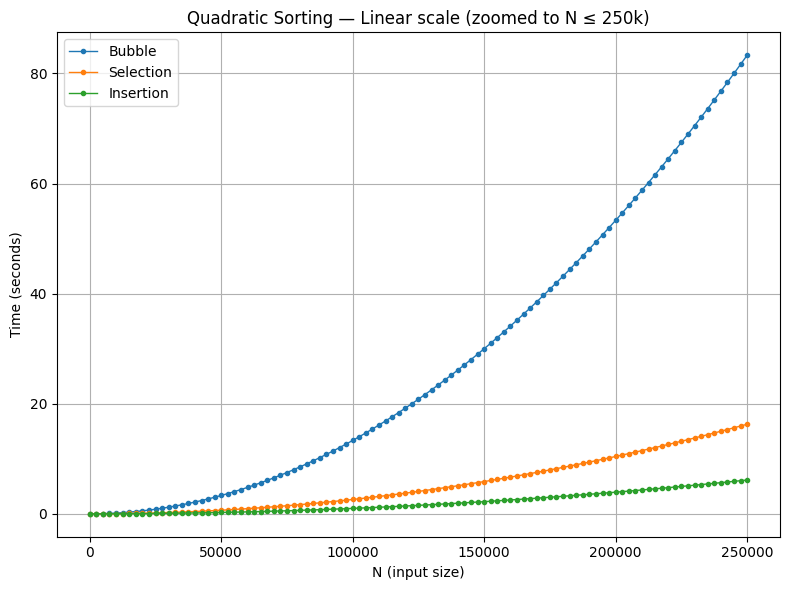

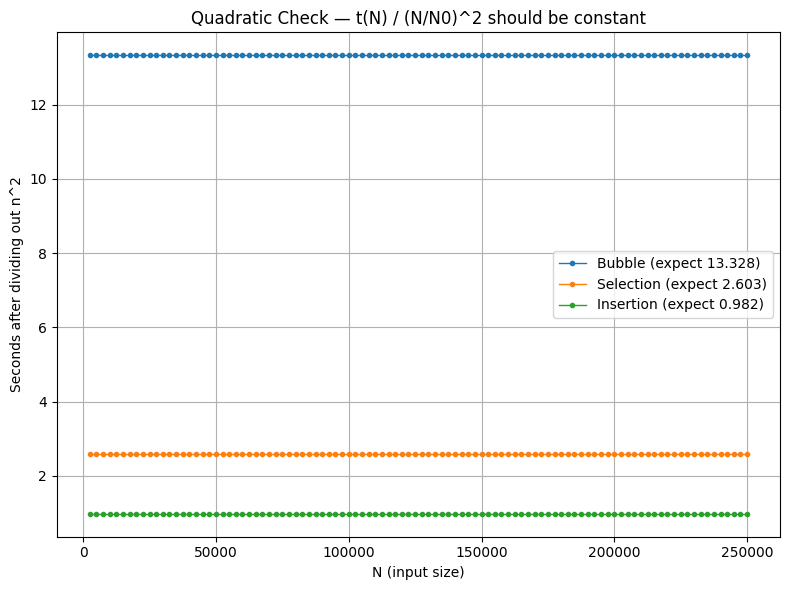

In [7]:
# @title
# === Add-on: make the quadratic "curve" obvious on linear scale, and verify n^2 by normalization ===
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Linear-scale, dense sampling, zoomed near the anchor
Ns_dense = np.arange(0, 250_000 + 1, 2_500, dtype=np.int64)  # linear spacing
def t_of(N, t0, N0=100_000):
    return t0 * (N / N0) ** 2

plt.figure(figsize=(8, 6))
plt.plot(Ns_dense, t_of(Ns_dense, 13.328), marker=".", linewidth=1, label="Bubble")
plt.plot(Ns_dense, t_of(Ns_dense,  2.603), marker=".", linewidth=1, label="Selection")
plt.plot(Ns_dense, t_of(Ns_dense,  0.982), marker=".", linewidth=1, label="Insertion")
plt.title("Quadratic Sorting — Linear scale (zoomed to N ≤ 250k)")
plt.xlabel("N (input size)")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "quadratic_sorts_linear_zoom.png", dpi=160, bbox_inches="tight")
plt.show()

# 2) Quadratic check: normalize away n^2 so curves become horizontal lines
#    y(N) = t(N) / (N/N0)^2  ==  t0   (constant per algorithm)
ratio = (Ns_dense / 100_000) ** 2
ratio[ratio == 0] = np.nan  # avoid division by zero at N=0 for the plot

plt.figure(figsize=(8, 6))
plt.plot(Ns_dense, t_of(Ns_dense, 13.328) / ratio, marker=".", linewidth=1, label="Bubble (expect 13.328)")
plt.plot(Ns_dense, t_of(Ns_dense,  2.603) / ratio, marker=".", linewidth=1, label="Selection (expect 2.603)")
plt.plot(Ns_dense, t_of(Ns_dense,  0.982) / ratio, marker=".", linewidth=1, label="Insertion (expect 0.982)")
plt.title("Quadratic Check — t(N) / (N/N0)^2 should be constant")
plt.xlabel("N (input size)")
plt.ylabel("Seconds after dividing out n^2")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(OUTPUT_DIR / "quadratic_sorts_quadratic_check.png", dpi=160, bbox_inches="tight")
plt.show()